#  Libraries

In [ ]:
pip install pytesseract

     |████████████████████████████████| 3.1 MB 6.1 MB/s 
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt
import pytesseract
pytesseract.pytesseract.tesseract_cmd = 'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'
import re

# The big rectangle issue and solution

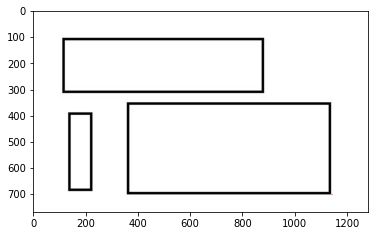

In [ ]:
Rectangles = cv2.imread('/content/BigRectangles.jpeg')


Rectangles_gray = cv2.cvtColor(Rectangles, cv2.COLOR_BGR2GRAY)

Rectangles_copy = Rectangles.copy()

blur = cv2.GaussianBlur(Rectangles_gray, (7, 7), 0.5)
edge = cv2.Canny(blur, 0, 50, 3)

contours, hierarchy = cv2.findContours(edge, cv2.RETR_EXTERNAL,
                                       cv2.CHAIN_APPROX_SIMPLE)


for contour, hier in zip(contours, hierarchy):
    (x,y,w,h) = cv2.boundingRect(contour)
    cv2.rectangle(Rectangles_copy, (x, y), (x + w, y + h), (255, 0, 0), 2)
    
plt.imshow(Rectangles_copy)

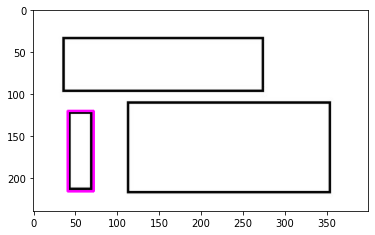

In [ ]:
Rectangles = cv2.imread('/content/BigRectangles.jpeg')
Rectangles = imutils.resize(Rectangles, width=400 )
Rectangles_copy = Rectangles.copy()

Rectangles_gray = cv2.cvtColor(Rectangles, cv2.COLOR_BGR2GRAY)

blur = cv2.GaussianBlur(Rectangles_gray, (7, 7), 0.5)
edge = cv2.Canny(blur, 0, 50, 3)

contours, hierarchy = cv2.findContours(edge, cv2.RETR_EXTERNAL,
                                       cv2.CHAIN_APPROX_SIMPLE)


for contour, hier in zip(contours, hierarchy):
    (x,y,w,h) = cv2.boundingRect(contour)
    cv2.rectangle(Rectangles_copy, (x, y), (x + w, y + h), (255, 0, 255), 2)
    
plt.imshow(Rectangles_copy)

# The function we made to read the number of any car

In [ ]:
Database = ['HR 26 DK 83 37', 'MT66UR7898']

def PlateNumberReader(imageAddress='TheCar2.jpg'):
    print('##################################################################################################')
    try:
        image = cv2.imread(imageAddress,1)
    except:
        print('The image address is wrong please enter it again')
        return
        
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    gray = cv2.GaussianBlur(gray, (7, 7), 0.5)
    edged =cv2.Canny(gray, 30, 100)

    contours,new = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key = cv2.contourArea, reverse = True)[:30]
    contours_image = image.copy()
    cv2.drawContours(contours_image,contours,-1,(255,0,255),3)
    
    print('Image before resizing')
    plt.imshow(imutils.opencv2matplotlib(contours_image))
    plt.show()
    
    if image.shape[1] < 600:
        print('The image width is smaller than 600 ('+str(image.shape[1])+') and most likely it will not work!')
        
    image = imutils.resize(image, width=600)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    gray = cv2.GaussianBlur(gray, (7, 7), 0.5)
    edged =cv2.Canny(gray, 30, 100)

    contours,new = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key = cv2.contourArea, reverse = True)[:30]
    contours_image = image.copy()
    cv2.drawContours(contours_image,contours,-1,(255,0,255),3) 
    
    print('Image after resizing')
    plt.imshow(imutils.opencv2matplotlib(contours_image))
    plt.show()

    plateContour = 'NUM'
    for c in contours:
        perimeter_of_contour = cv2.arcLength(c, True)
        #True: it considers the contour to be closed.
        approx = cv2.approxPolyDP(c, 0.01 * perimeter_of_contour, True) #approximating a shape
        if len(approx) == 4:
            plateContour = approx
            x,y,w,h = cv2.boundingRect(c)
            new_image=image[y:y+h,x:x+w]
            cv2.imwrite('CROPPED_IMAGE.png',new_image)
            break


    image_clone = image.copy()
    try:
        print('The contour of the plate only')
        cv2.drawContours(image_clone, [plateContour], -1, (255,0,255), 3)
        plt.imshow(imutils.opencv2matplotlib(image_clone))
        plt.show()
    except:
        print('No Plate contour detected')
        print('')
        print('##################################################################################################')
        print('')
        return


    try:   
        plt.imshow(imutils.opencv2matplotlib(cv2.imread('CROPPED_IMAGE.png')))
        plt.show()
        text=pytesseract.image_to_string('CROPPED_IMAGE.png')
        print("Number is:" ,text)
        text = re.sub('\W', '', text)
        print('The better number is:', text)
        
        inDataBase = False
        for plateNumber in Database:
            if text == re.sub('\W', '', plateNumber):
                print('\nWelcome', text)
                inDataBase = True
                break
                

        if inDataBase == False:
            print('\nGO AWAY')   
        print('')
    except:
        print('No Plate contour detected')
        print('')
        print('##################################################################################################')
        print('')
        return
    print('##################################################################################################')
    print('')
    print('')

##################################################################################################
Image before resizing


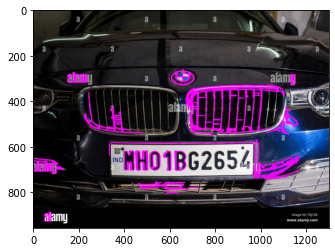

Image after resizing


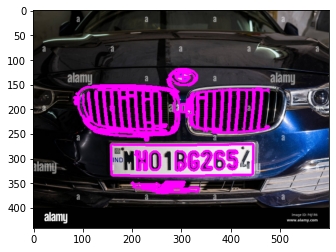

The contour of the plate only


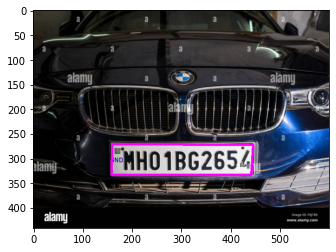

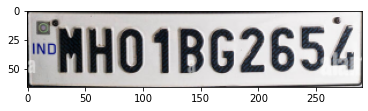

Number is: MHO1BG2654

The better number is: MHO1BG2654

GO AWAY

##################################################################################################


##################################################################################################
Image before resizing


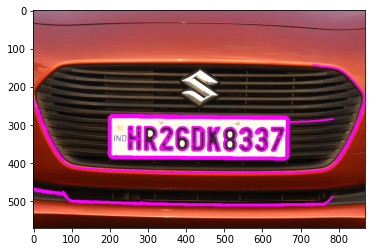

Image after resizing


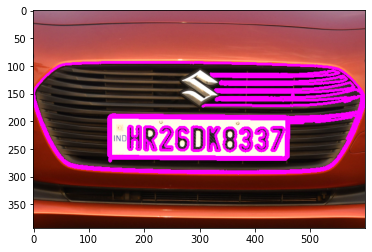

The contour of the plate only


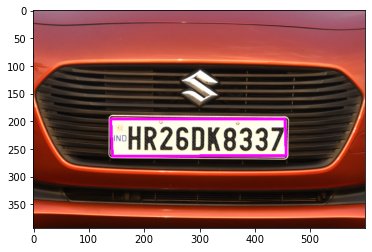

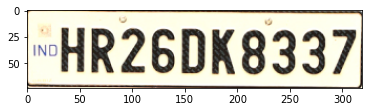

Number is: ~HR26DK8337

The better number is: HR26DK8337

Welcome HR26DK8337

##################################################################################################




In [ ]:
PlateNumberReader('TheCar.jpg')
PlateNumberReader('TheCar2.jpg')